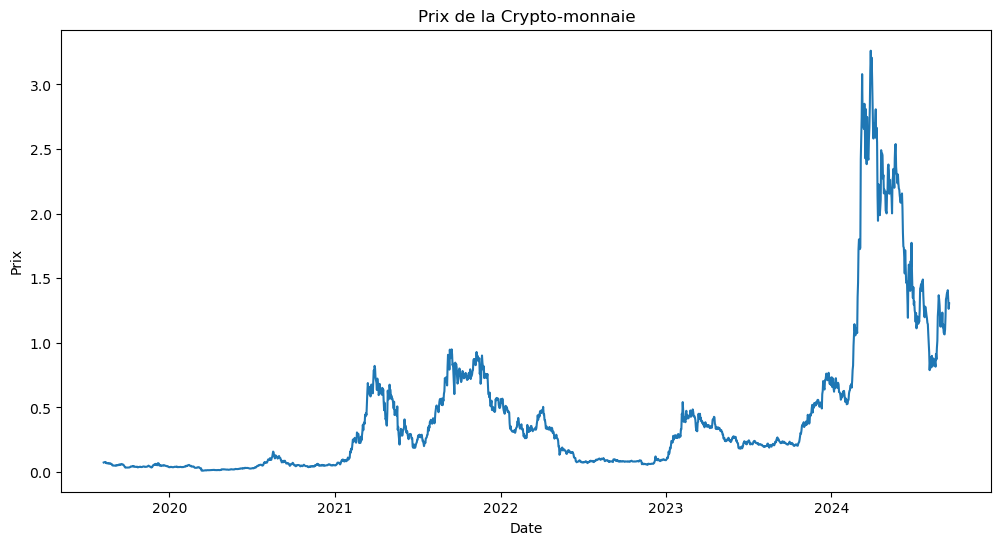

In [1]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Charger les données (par exemple, depuis un fichier CSV)
# Remplacez 'crypto_prices.csv' par le chemin de votre fichier
data = pd.read_csv("C:/Users/ETOUNDI/Downloads/Artificial.csv", parse_dates=['Date'], index_col='Date')

# Visualiser les données
plt.figure(figsize=(12, 6))
plt.plot(data['Price'])
plt.title('Prix de la Crypto-monnaie')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.show()


In [2]:


# Vérifier la stationnarité des données avec le test ADF
result = adfuller(data['Price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Si la p-value est supérieure à 0.05, les données ne sont pas stationnaires.
# Vous devrez peut-être différencier les données.
data['Price_diff'] = data['Price'].diff().dropna()

# Vérifiez à nouveau la stationnarité sur les données différenciées
result = adfuller(data['Price_diff'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Ajuster le modèle ARIMA
# Remplacez (p, d, q) par les valeurs appropriées après avoir analysé les ACF/PACF
model = ARIMA(data['Price'], order=(5, 1, 1))  # Exemple avec (5, 1, 0)
model_fit = model.fit()

# Résumé du modèle
print(model_fit.summary())




ADF Statistic: -2.7532822301654476
p-value: 0.06526314299586271
ADF Statistic: -6.776708019061834
p-value: 2.559839024515835e-09


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was p

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1867
Model:                 ARIMA(5, 1, 1)   Log Likelihood                2952.387
Date:                Fri, 11 Oct 2024   AIC                          -5890.774
Time:                        15:44:39   BIC                          -5852.053
Sample:                             0   HQIC                         -5876.507
                               - 1867                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5374      0.071     -7.582      0.000      -0.676      -0.398
ar.L2          0.0217      0.010      2.184      0.029       0.002       0.041
ar.L3          0.0757      0.012      6.517      0.0

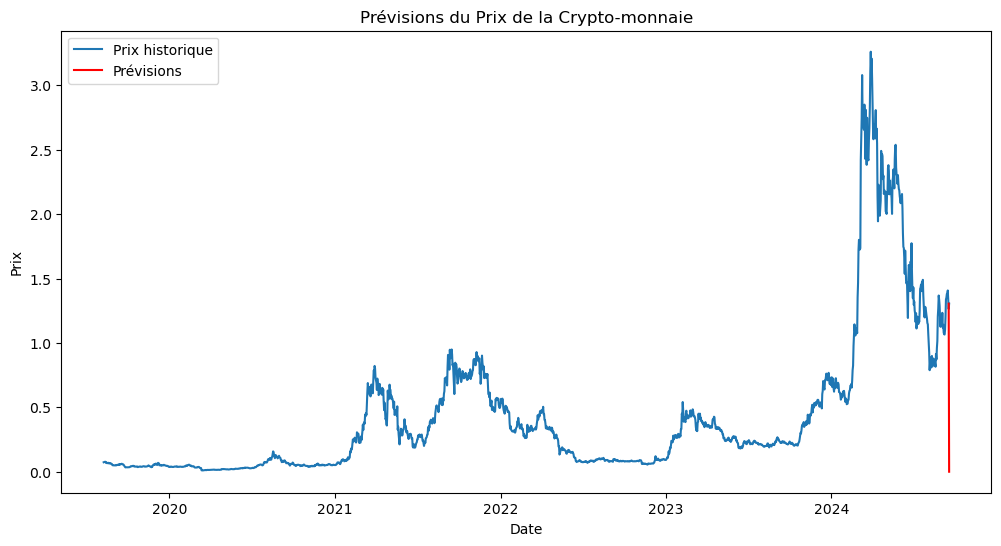

In [7]:
# Faire des prévisions
forecast = model_fit.predict(start=data['Price'].index[0],end=data["Price"].index[1])  # Prévisions pour 30 jours
plt.figure(figsize=(12, 6))
plt.plot(data['Price'], label='Prix historique')
plt.plot(forecast, label='Prévisions', color='red')
plt.title('Prévisions du Prix de la Crypto-monnaie')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.show()